#**Text Minig**

## Which is known as text data mining or text analytics is the process of automatically extracting useful information and patterns from large collections of written text.

## Instead of reading every document by hand, text-mining tools use algorithms to find insights quickly.

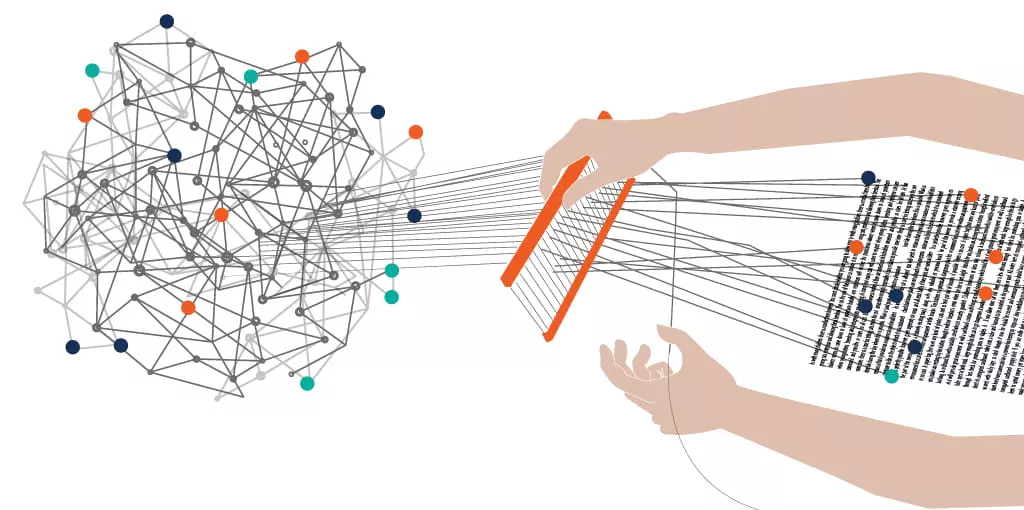



---

# **Why we focus on Text Mining ?**

## We generate enormous amounts of text every day (e.g. emails, social-media posts, reports,...). Text mining **Handles Big Data**, and helps us make sense of it all.

## By discovering the trends and sentiments, organizations can make smarter choices, in marketing, customer service, research, and beyond.

## It is using in several Real-Workd Applications like:

1. **Business Intelligence** (Track customer opinions in reviews or social media to improve products.)
2. **Healthcare** (Analyze clinical notes to discover side-effect patterns or treatment outcomes.)
3. **Academia** (Mine research papers to find emerging scientific trends.)



---

# **Core Steps in Text Mining**

## **1. Preprocessing:**
###Clean the raw text (remove extra spaces, correct typos, strip out irrelevant symbols).

##**2. Tokenization:**
###Break text into pieces (“tokens”) which are usually words or phrases.

##**3. Normalization:**
###Convert tokens to a standard form (e.g., lowercasing, stemming or lemmatization to get word roots).

##**4. Feature Extraction:**
###Transform words into numerical representations—such as term-frequency counts or word-embeddings.

##**5. Analysis & Modeling:**
###Apply statistical or machine-learning methods to find patterns (e.g., topic modeling, sentiment analysis, clustering).

In [1]:
! pip install nltk



---


# **NLTK (Natural Language Toolkit)**

### - A free, open-source library for Python
### - makes it easy to work with human language data.
### - offers tools and resources for tasks like breaking text into words, tagging parts of speech, and building language models.

In [2]:
import nltk

In [3]:
#punkt' package, which is a tokenizer used by NLTK for splitting text into sentences or words.
nltk.download('punkt_tab') # Download the punkt_tab resource
sentence = "NLTK is a powerful; library for natural language processing"
tokens = nltk.word_tokenize(sentence)
#this function split this sentence into words

tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['NLTK',
 'is',
 'a',
 'powerful',
 ';',
 'library',
 'for',
 'natural',
 'language',
 'processing']



---

# **Lexicon-Based Sentiment Analysis**

## Uses a dictionary of words where each word has an associated sentiment score.

## **1- Lexicon**:

### Is a list of words (and sometimes short phrases).

###Each word has a “valence” score showing its emotional value (for example, “happy” might be +3, “sad” might be −2).

## **2- Scoring Text:**

###- *Tokenization:*
### Split your text into individual words or phrases (tokens).
###- *Lookup:*
### For each token, find its valence score in the lexicon.
###- *Combine Scores:*
### Add up or average the scores to get an overall sentiment for the text.
## **3- Lookup and Adjust:**
### It finds each word’s score, tweak for “not,” “very,” “but,” etc.
## **4- Final Score**
### VADER (= lexicon-and-rule-based tool for measuring sentiment in text.) combines these adjusted values into a single compound score that shows the sentence is mostly neutral with mixed feelings.

In [4]:
! pip install python-docx # for importing docx files and work with microsoft word in Python.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 3.8 MB/s eta 0:00:00


In [5]:
from docx import Document # letting us read, create and modify word files and loading them.

In [9]:
import os # For checking files and interact with the operating-system

#load the word document
doc_path = '/content/CNN.docx'

if os.path.exists(doc_path):
  doc = Document(doc_path)
  #extract text from paragraphs in the document
  text = '\n'.join([paragraph.text for paragraph in doc.paragraphs]) #normalize and harmonize the text for processing.
  print("Document loaded successfully.")
else:
  print(f"Error: Document not found at {doc_path}. Please upload the file.")
  print("You can upload files by clicking on the folder icon in the left sidebar, then clicking the \"Upload to session storage\" icon.")

Document loaded successfully.


In [10]:
#extract text from paragraphs in the document
#normalize and harmonize the text for processing.

text = '\n'.join([paragraph.text for paragraph in doc.paragraphs]) #normalize and harmonize the text for processing.

text

'Missiles fired from Iran toward US bases in Qatar and Iraq\nFrom CNN’s Kevin Liptak, Alayna Treene, Kristen Holmes, Kaitlan Collins and Jeff Zeleny\nThe US is tracking multiple missiles fired from Iran toward US military installations in Qatar and Iraq, according to two officials familiar with the matter.\nDefense Secretary Pete Hegseth and Joint Chiefs of Staff Chairman Dan Caine are in the Situation Room, according to a White House official.\nA senior official said earlier that White House and Defense Department officials were monitoring potential attack threats to Al Udeid Air Base in Qatar. President Donald Trump toured the base last month, the first commander in chief to visit since 2003. It is the largest US military installation in the Middle East.\n“No visit in the Gulf would be complete without stopping to salute the people who keep America safe, strong and free,” Trump told the troops at the base on May 17.\n'



---

# **VADER Lexicon**

### - Contains words/phrases rated for positivity or negativity.
### - Designed for social-media style text (slang, emojis, acronyms).
### - VADER looks up each word’s score in the lexicon, applies simple rules for negation (“not good”), intensifiers (“very happy”), etc. Finally, it Combines all adjusted scores to judge a text’s overall mood.


In [11]:
#download the VADER lexicon (dictionary for computing different emotions) if not already downlouded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True


---


# **Compound Score in Sentiment Analysis**

###- Compound Score is a single number that sums up the overall mood of text.

###- it adds up each word’s sentiment score (x), and using the below formula for Normalization.
# x / √(x² + α)

#### ***Note:*** α (alpha) is a constant (usually 15).


### The Normalized Compound Score will be devided in:

- +1 = Very Positive
-  0 = Neutral
- -1 = Very Negative

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
#creat a sentimentintensityanalyzer object
sia = SentimentIntensityAnalyzer() #sia is our model that we created

In [13]:
#perform sentiment analysis
sentiment_scores = sia.polarity_scores(text)

#interpret the sentiment scores
if sentiment_scores['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

In [14]:
sentiment_scores #it is a dictionary = keys with their values (each key has value that defined as weight)

{'neg': 0.078, 'neu': 0.852, 'pos': 0.07, 'compound': -0.6549}

In [15]:
sentiment_scores['compound'] #this one part of the dictionary

-0.6549

In [16]:
sentiment_scores['compound']
print(f"Sentiment: {sentiment}")

Sentiment: Negative
